### **Data Pre-Processing**

### Import Required Packages and Data

In [1]:
# Importing essential libraries for data manipulation, visualization, and numerical computations
import pandas as pd  # For handling data structures like DataFrame
import numpy as np   # For numerical operations on arrays

# Libraries for visualizations
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns            # Advanced statistical visualizations
import plotly.express as px      # Interactive visualizations

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")  # Ignore any warning messages

# Ensure that plots are displayed inline in Jupyter notebooks
%matplotlib inline

In [2]:
from datetime import datetime

**Load the CSV data into a DataFrame**

In [3]:
df = pd.read_csv("EasyVisa.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### **Data Cleaning**

**Remove case_id from the dataset as it cannot used in Model Training**

In [5]:
df.drop("case_id",inplace=True, axis=1)

In [6]:
df.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


### **Handling Outliers**

***Handling outliers in the no_of_employees as a company can't have negative number of employees.***

In [7]:
df_1 = df.copy()

In [8]:
# Remove negative values in 'no_of_employees'
df_1 = df_1[df_1['no_of_employees'] >= 0]

In [9]:
df_1['no_of_employees'].describe()

count     25447.000000
mean       5674.415334
std       22891.842245
min          12.000000
25%        1025.000000
50%        2112.000000
75%        3506.500000
max      602069.000000
Name: no_of_employees, dtype: float64

We have no more negative values for `no_of_employees`.

### **Features Engineering**

- *****Company Age (Derived from yr_of_estab)***** 

In [10]:
df_2 = df_1.copy()

In [11]:
# Calculate the current year
current_year = datetime.now().year

# Create 'company_age' feature
df_2['company_age'] = current_year - df_2['yr_of_estab']

In [12]:
df_2.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16


In [13]:
df_2["company_age"].describe()

count    25447.000000
mean        44.605494
std         42.385932
min          8.000000
25%         19.000000
50%         27.000000
75%         48.000000
max        224.000000
Name: company_age, dtype: float64

Now we can remove the `yr_of_estab`.

In [14]:
df_2.drop('yr_of_estab',inplace=True, axis=1)
df_2.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16


**Extracting Numerical and Categorical Features**

In [15]:
# Identify numerical features
numeric_features = [feature for feature in df_2.columns if pd.api.types.is_numeric_dtype(df_2[feature])]
    
# Identify categorical features
categorical_features = [feature for feature in df_2.columns if pd.api.types.is_object_dtype(df_2[feature])]

# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['no_of_employees', 'prevailing_wage', 'company_age']

We have 8 categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### **Checking for Skewness and oulier in Numerical Features**

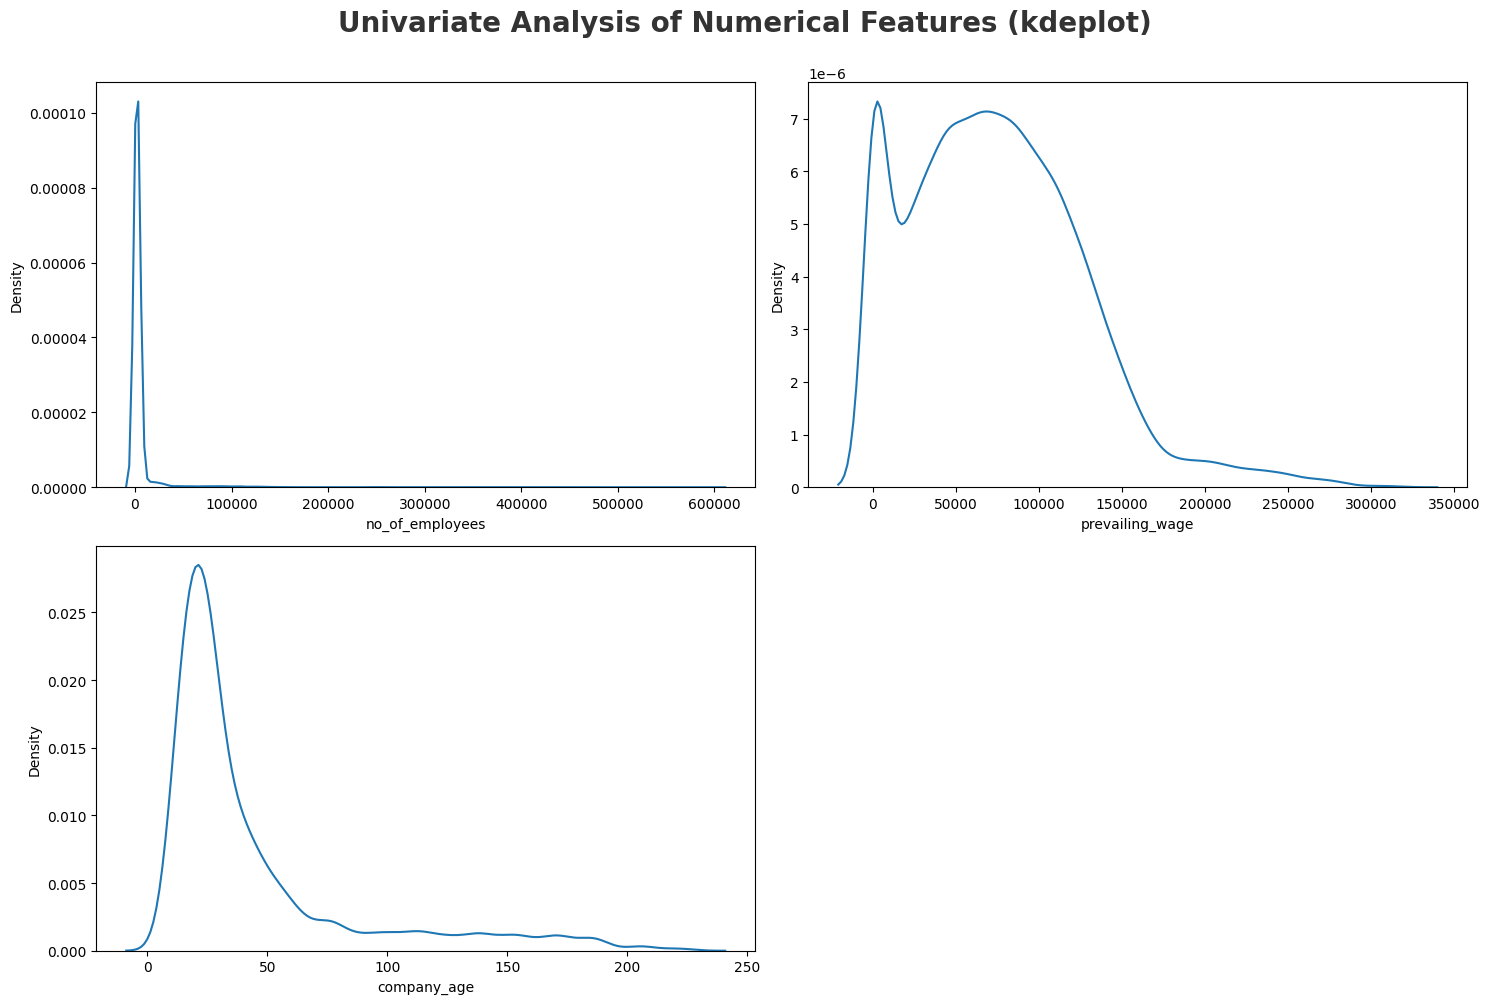

In [16]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features (kdeplot)", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df_2[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

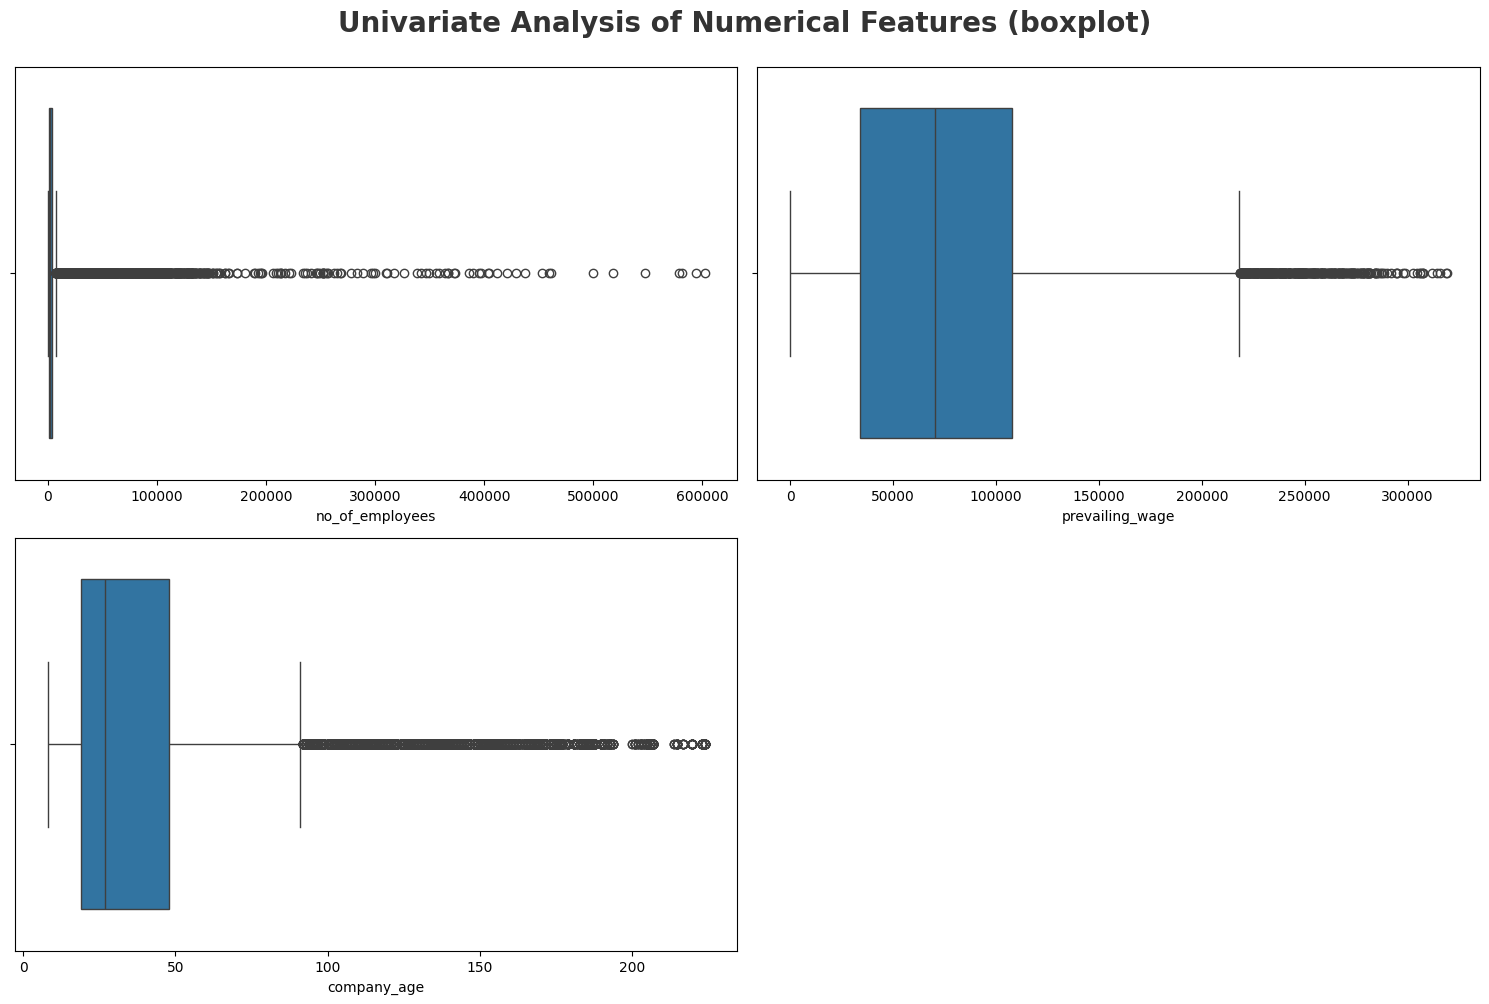

In [17]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features (boxplot)", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_2[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### **Log Transformation for Skewed Data**

***To normalize the skewed distributions of company_age and no_of_employees***

In [18]:
df_3 = df_2.copy()

In [19]:
# Log-transform skewed features
df_3['log_company_age'] = np.log1p(df_3['company_age'])
df_3['log_no_of_employees'] = np.log1p(df_3['no_of_employees'])

Next we can drop the `no_of_employees` and `company_age` column.

In [20]:
df_3.drop(["company_age", "no_of_employees"], inplace=True, axis=1)
df_3.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,log_company_age,log_no_of_employees
0,Asia,High School,N,N,West,592.2029,Hour,Y,Denied,2.890372,9.582869
1,Asia,Master's,Y,N,Northeast,83425.6500,Year,Y,Certified,3.135494,7.788626
2,Asia,Bachelor's,N,Y,West,122996.8600,Year,Y,Denied,2.833213,10.702008


In [21]:
# Identify numerical features
numeric_features = [feature for feature in df_3.columns if pd.api.types.is_numeric_dtype(df_3[feature])]
    
# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")

We have 3 numerical features: ['prevailing_wage', 'log_company_age', 'log_no_of_employees']


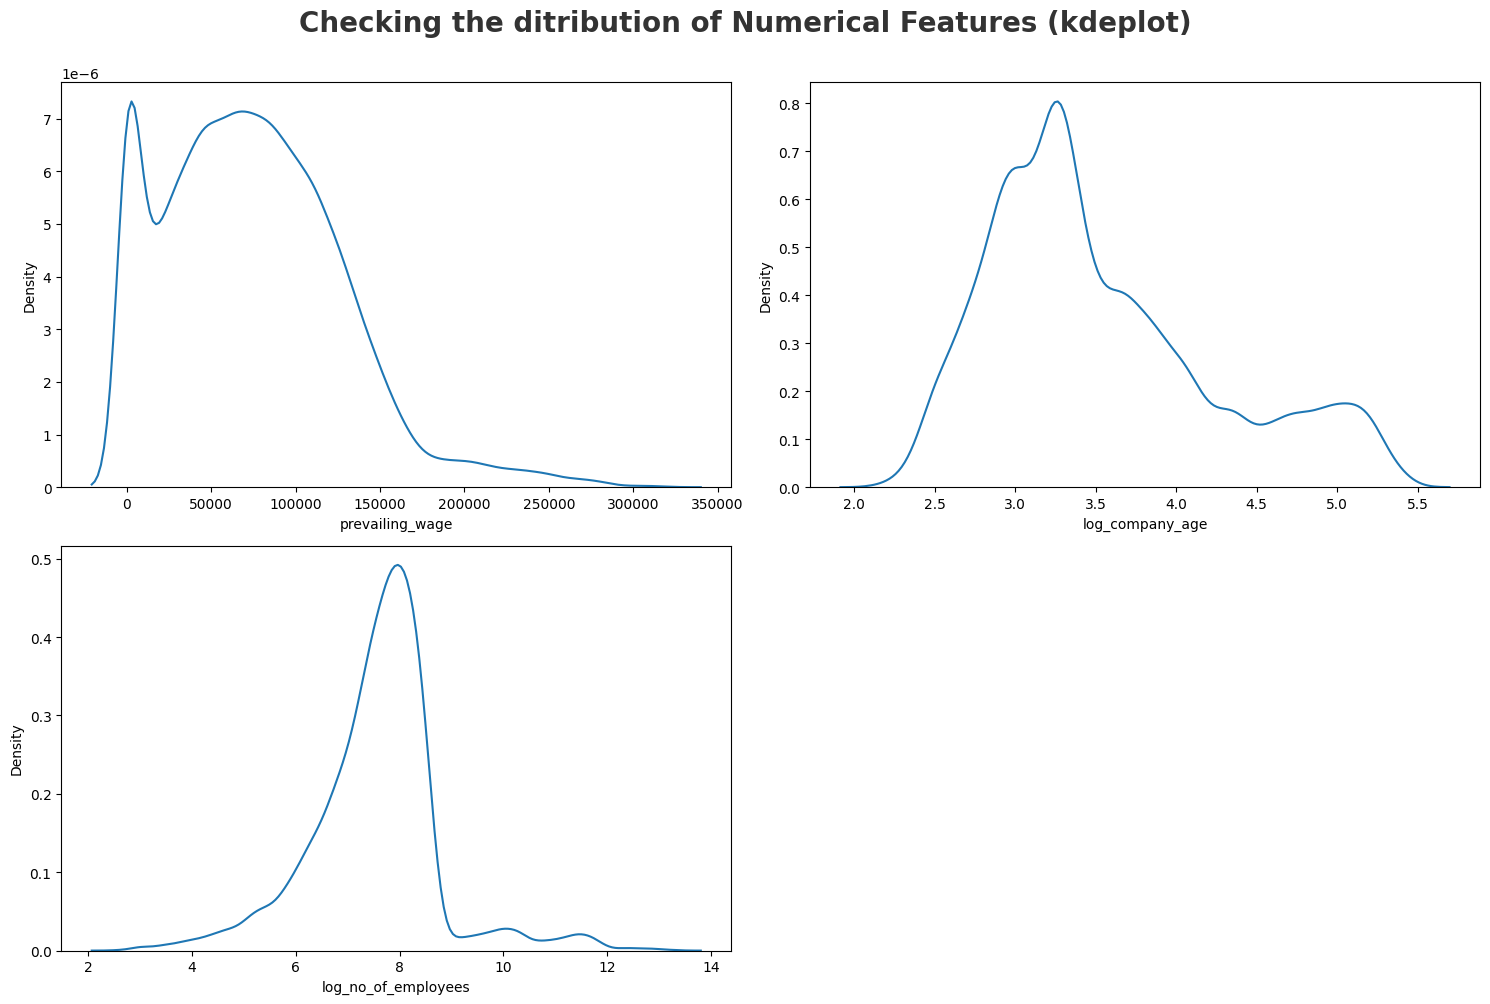

In [22]:
plt.figure(figsize=(15,10))
plt.suptitle("Checking the ditribution of Numerical Features (kdeplot)", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df_3[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [23]:
from scipy.stats import f_oneway

In [24]:
# Initialize a dictionary to store ANOVA F-statistic and p-values for each numerical feature
anova_results = {}

# Loop through each numerical feature and apply ANOVA
for col in numeric_features:
    # Create groups for Certified and Denied based on the target variable
    certified_group = df_3[col][df_3['case_status'] == 'Certified']
    denied_group = df_3[col][df_3['case_status'] == 'Denied']
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(certified_group, denied_group)
    
    # Store the results
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert the ANOVA results to a DataFrame
anova_df = pd.DataFrame(anova_results).T

# Print the ANOVA results
print(anova_df)


                     F-statistic       p-value
prevailing_wage       146.353258  1.344011e-33
log_company_age         5.943883  1.477524e-02
log_no_of_employees    17.443514  2.969580e-05


In [25]:
# Select only the features with p-values < 0.05 (significant features)
significant_features = anova_df[anova_df['p-value'] < 0.05].index.tolist()
# Print the Significant Features
print(significant_features)

['prevailing_wage', 'log_company_age', 'log_no_of_employees']


Here we can see `prevailing_wage` have higher F-statistic value(~146.35) which mean that the feature has a stronger impact on the target variable. So we will try more Feature Engineer on `prevailing_wage` to reveal more info and for `log_no_of_employees` we can bin them to category.

In [26]:
df_4 = df_3.copy()

In [27]:
# Create interaction features
df_4['wage_per_employee'] = df_4['prevailing_wage'] / df_4['log_no_of_employees']

# Create categorical versions
size_bins = [0, 50, 250, 1000, 5000, float('inf')]
size_labels = ['Micro', 'Small', 'Medium', 'Large', 'Enterprise']

df_4['size_brackets'] = pd.cut(df_4['log_no_of_employees'], 
                           bins=size_bins, 
                           labels=size_labels)

# Create continent-specific wage percentiles
df_4['wage_percentile'] = df_4.groupby('continent')['prevailing_wage'].rank(pct=True)

# Create more wage-related features
df_4['wage_to_industry_median_ratio'] = df_4['prevailing_wage'] / df_4.groupby('continent')['prevailing_wage'].transform('median')
df_4['high_wage_flag'] = df_4['wage_percentile'] > 0.75

# Combine wage percentile with company size
df_4['size_adjusted_wage'] = df_4['wage_percentile'] * df_4['log_no_of_employees']

In [28]:
df_4.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,log_company_age,log_no_of_employees,wage_per_employee,size_brackets,wage_percentile,wage_to_industry_median_ratio,high_wage_flag,size_adjusted_wage
0,Asia,High School,N,N,West,592.2029,Hour,Y,Denied,2.890372,9.582869,61.798080,Micro,0.056888,0.007774,False,0.545154
1,Asia,Master's,Y,N,Northeast,83425.6500,Year,Y,Certified,3.135494,7.788626,10711.215213,Micro,0.552791,1.095125,False,4.305482
2,Asia,Bachelor's,N,Y,West,122996.8600,Year,Y,Denied,2.833213,10.702008,11492.877121,Micro,0.810689,1.614575,True,8.675998


In [29]:
df_5 = df_4.copy()

In [30]:
# Identify numerical features
numeric_features = [feature for feature in df_5.columns if pd.api.types.is_numeric_dtype(df_5[feature])]

# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")

We have 8 numerical features: ['prevailing_wage', 'log_company_age', 'log_no_of_employees', 'wage_per_employee', 'wage_percentile', 'wage_to_industry_median_ratio', 'high_wage_flag', 'size_adjusted_wage']


In [31]:
# Initialize a dictionary to store ANOVA F-statistic and p-values for each numerical feature
anova_results = {}

# Loop through each numerical feature and apply ANOVA
for col in numeric_features:
    # Create groups for Certified and Denied based on the target variable
    certified_group = df_5[col][df_5['case_status'] == 'Certified']
    denied_group = df_5[col][df_5['case_status'] == 'Denied']
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(certified_group, denied_group)
    
    # Store the results
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert the ANOVA results to a DataFrame
anova_df = pd.DataFrame(anova_results).T

# Print the ANOVA results
print(anova_df)


                               F-statistic       p-value
prevailing_wage                 146.353258  1.344011e-33
log_company_age                   5.943883  1.477524e-02
log_no_of_employees              17.443514  2.969580e-05
wage_per_employee               114.468534  1.172385e-26
wage_percentile                 210.257723  1.866486e-47
wage_to_industry_median_ratio   186.212728  3.005202e-42
high_wage_flag                   26.990754  2.060060e-07
size_adjusted_wage              206.095851  1.484893e-46


In [32]:
# Select only the features with p-values < 0.05 (significant features)
significant_features = anova_df[anova_df['p-value'] < 0.05].index.tolist()
# Print the Significant Features
print(significant_features)

['prevailing_wage', 'log_company_age', 'log_no_of_employees', 'wage_per_employee', 'wage_percentile', 'wage_to_industry_median_ratio', 'high_wage_flag', 'size_adjusted_wage']


Here we can see `prevailing_wage` have higher F-statistic value(~146.35) which mean that the feature has a stronger impact on the target variable. So we will try more Feature Engineer on `prevailing_wage` to reveal more info.

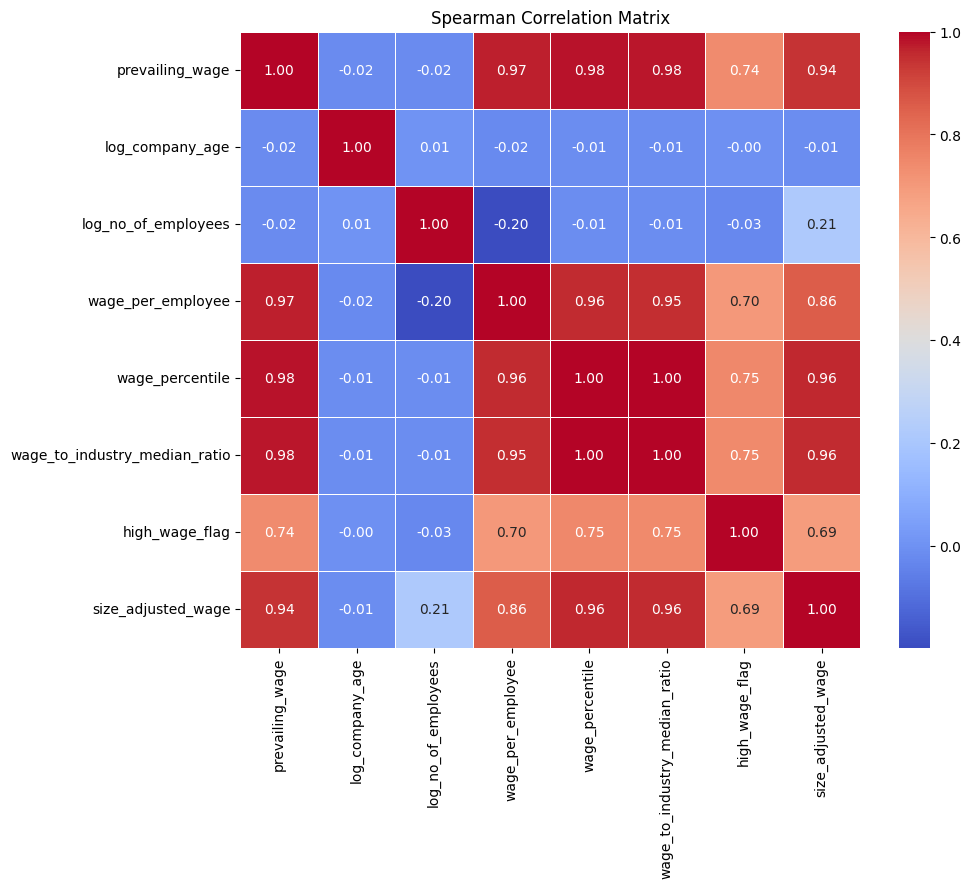

In [33]:
# Calculate the Spearman correlation matrix for the numerical features
spearman_corr = df_5[numeric_features].corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

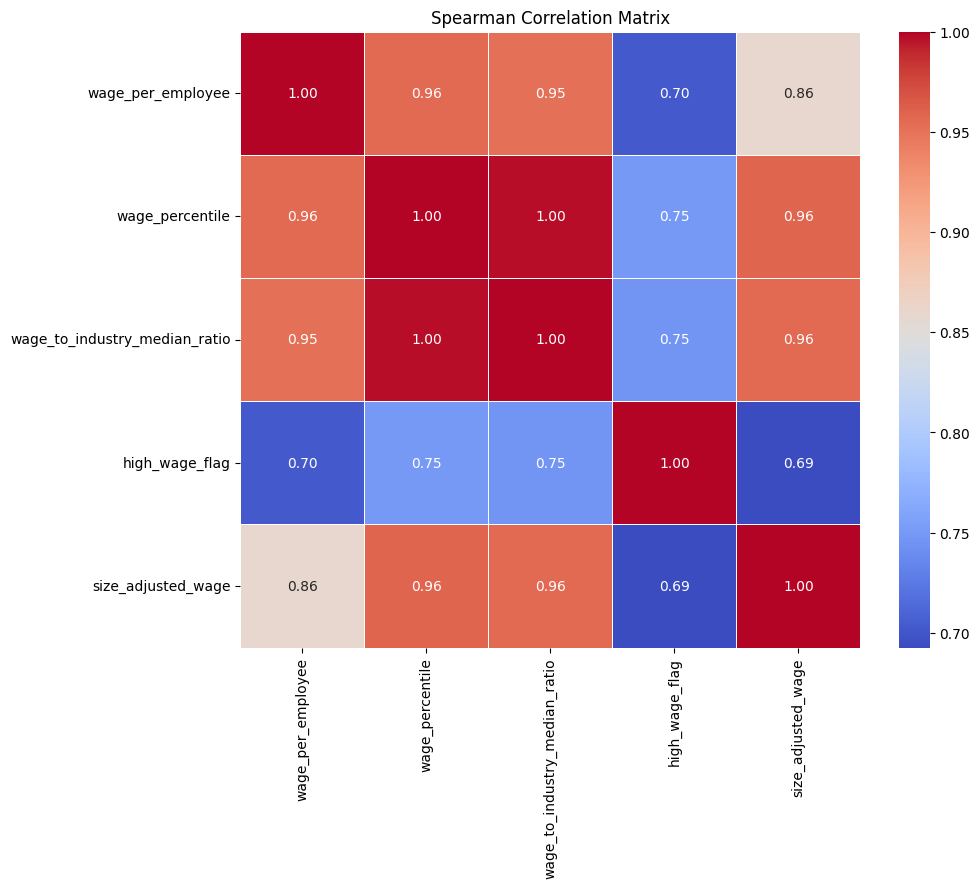

In [34]:
new_features = ['wage_per_employee', 'wage_percentile', 'wage_to_industry_median_ratio', 'high_wage_flag', 'size_adjusted_wage']
# Calculate the Spearman correlation matrix for the New features
spearman_corr = df_5[new_features].corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix of New Features')
plt.show()

Conclusion:

   - Prioritize wage_percentile for its strong predictive power.
   - Drop prevailing_wage, high_wage_flag, wage_to_industry_median_ratio and size_adjusted_wage to avoid multicollinearity.
   - Drop one or both of wage_to_industry_median_ratio and size_adjusted_wage to avoid multicollinearity.
   - Retain log_no_of_employees.

In [36]:
df_6 = df_5.copy()

In [37]:
# Dropping features based on updated insights
df_6.drop(['prevailing_wage', 'wage_to_industry_median_ratio', 'size_adjusted_wage', 'high_wage_flag', 'wage_per_employee'],inplace=True, axis=1)

# Now check the new set of features
df_6.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status,log_company_age,log_no_of_employees,size_brackets,wage_percentile
0,Asia,High School,N,N,West,Hour,Y,Denied,2.890372,9.582869,Micro,0.056888
1,Asia,Master's,Y,N,Northeast,Year,Y,Certified,3.135494,7.788626,Micro,0.552791
2,Asia,Bachelor's,N,Y,West,Year,Y,Denied,2.833213,10.702008,Micro,0.810689
3,Asia,Bachelor's,N,N,West,Year,Y,Denied,4.852030,4.595120,Micro,0.553029
4,Africa,Master's,Y,N,South,Year,Y,Certified,2.995732,6.987490,Micro,0.941818


In [38]:
# Identify numerical features
numeric_features = [feature for feature in df_6.columns if pd.api.types.is_numeric_dtype(df_6[feature])]

# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")

We have 3 numerical features: ['log_company_age', 'log_no_of_employees', 'wage_percentile']


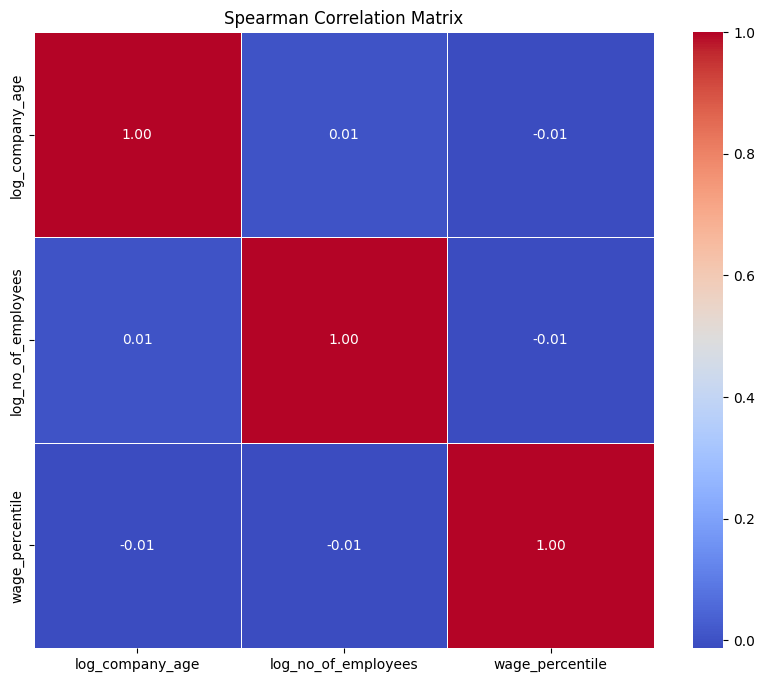

In [39]:
# Calculate the Spearman correlation matrix for the Old features
spearman_corr = df_6[numeric_features].corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

### **Insights**

The Spearman correlation matrix shows near-zero correlations among `log_company_age`, `log_no_of_employees`, and `wage_percentile`. This indicates:

1. **Low Feature Interdependence**: Each feature contributes unique information with minimal redundancy.
2. **No Strong Relationships**: Company age, size, and wage percentiles are not significantly related.

These features can be effectively used together in the model, as they won’t introduce multicollinearity issues.

In [40]:
# Identify categorical features
categorical_features = [feature for feature in df_6.columns if pd.api.types.is_object_dtype(df_6[feature])]

# Print the results
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 8 categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [41]:
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [42]:
#  Function to perform Chi-Square Test
def chi_square_test(feature, target):
    contingency_table = pd.crosstab(feature, target)
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    return chi2_stat, p_val

#  Cramér's V calculation
def cramers_v(feature, target):
    contingency_table = pd.crosstab(feature, target)
    chi2_stat, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2_stat / (n * min_dim))

# Function to calculate Cramér's V between two categorical features
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

#  Function for Logistic Regression for Binary Features
def logistic_regression(feature, target):
    # Label encoding for the feature
    le_feature = LabelEncoder()
    le_target = LabelEncoder()

    feature_encoded = le_feature.fit_transform(feature)
    target_encoded = le_target.fit_transform(target)
    
    # Fit Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(feature_encoded.reshape(-1, 1), target_encoded)
    
    # Use StatsModels for detailed analysis
    feature_with_constant = sm.add_constant(feature_encoded)
    logit_model = sm.Logit(target_encoded, feature_with_constant)
    result = logit_model.fit()
    return result.summary()

In [43]:
# Define target and categorical features
target = df_6['case_status']

# 4. Apply Chi-Square and Cramér's V on all features
chi_square_results = {}
cramers_v_results = {}

for feature in categorical_features:
    chi2_stat, p_val = chi_square_test(df_6[feature], target)
    cramer_v = cramers_v(df_6[feature], target)
    chi_square_results[feature] = {'Chi2 Stat': chi2_stat, 'p-value': p_val}
    cramers_v_results[feature] = cramer_v

# 5. Display Chi-Square and Cramér's V Results
chi_square_df = pd.DataFrame(chi_square_results).T
cramers_v_df = pd.DataFrame(cramers_v_results, index=['Cramér\'s V']).T

print("Chi-Square Test Results:")
print(chi_square_df)
print("\nCramér's V Results:")
print(cramers_v_df)

# 6. Apply Logistic Regression for Binary Features
binary_features = ['has_job_experience', 'requires_job_training', 'full_time_position']

print("\nLogistic Regression Results for Binary Features:")
for feature in binary_features:
    print(f"\nLogistic Regression for {feature}:")
    print(logistic_regression(df_6[feature], target))

Chi-Square Test Results:
                          Chi2 Stat        p-value
continent                349.455905   2.292159e-73
education_of_employee   2764.634351   0.000000e+00
has_job_experience       939.581403  2.440633e-206
requires_job_training      1.586891   2.077709e-01
region_of_employment     296.703363   5.570491e-63
unit_of_wage            1103.744687  5.606010e-239
full_time_position         4.055984   4.401507e-02
case_status            25442.490500   0.000000e+00

Cramér's V Results:
                       Cramér's V
continent                0.117187
education_of_employee    0.329610
has_job_experience       0.192154
requires_job_training    0.007897
region_of_employment     0.107980
unit_of_wage             0.208265
full_time_position       0.012625
case_status              0.999911

Logistic Regression Results for Binary Features:

Logistic Regression for has_job_experience:
Optimization terminated successfully.
         Current function value: 0.617140
         Itera

In [44]:
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 == feature2:
            cramers_v_matrix.loc[feature1, feature2] = 1.0  # Same features have a perfect relationship
        else:
            cramers_v_matrix.loc[feature1, feature2] = cramers_v(df_6[feature1], df_6[feature2])

# Display the Cramér's V matrix
# print("Pairwise Cramér's V Matrix:")
# print(cramers_v_matrix)

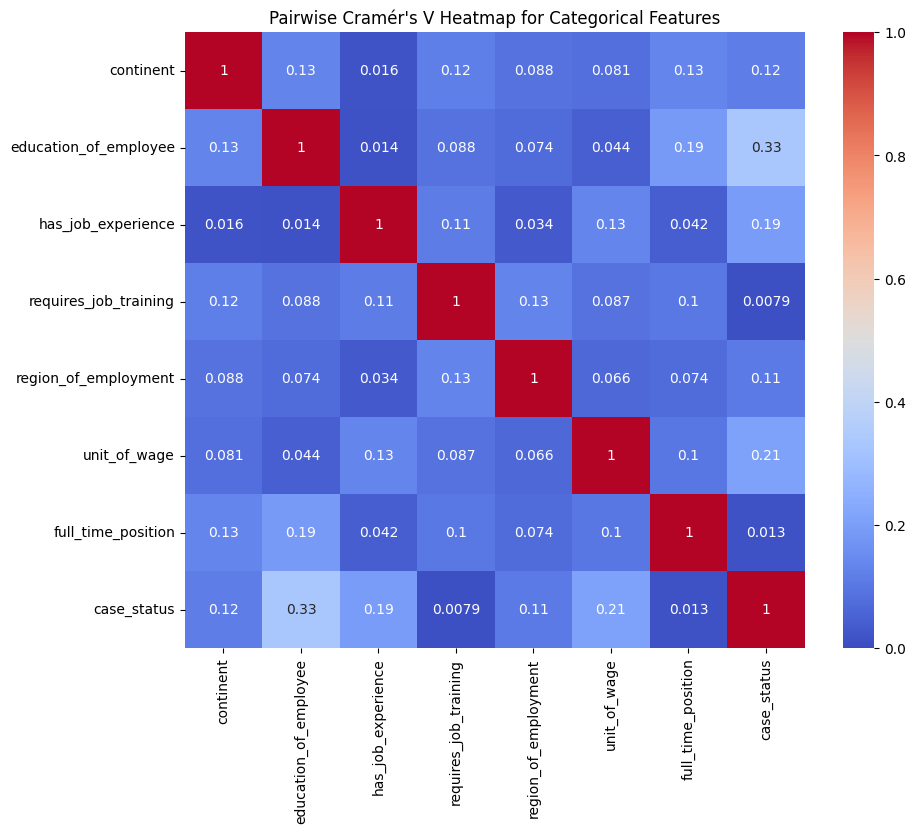

In [45]:
# Convert the Cramér's V matrix to numeric for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Pairwise Cramér's V Heatmap for Categorical Features")
plt.show()

### **Insights**

**1- Cramér's V Insights**:
   - The highest association with `case_status` is for `education_of_employee` (0.33), indicating it plays a key role in predicting visa status.
   - `unit_of_wage` and `has_job_experience` also show moderate associations with `case_status`, with Cramér's V values of 0.21 and 0.19, respectively.
   - `requires_job_training` and `full_time_position` show very low association with `case_status`, suggesting minimal predictive value.

**2- Chi-Square Test Results**:
   - Features such as `education_of_employee`, `has_job_experience`, `region_of_employment`, and `unit_of_wage` have statistically significant associations with `case_status` (p-values close to 0), indicating that they add predictive value.
   - `requires_job_training` has a high p-value (0.21), indicating no significant relationship with `case_status` and may be less useful.

**3- Logistic Regression Analysis**:
   - **`has_job_experience`**: Shows a strong negative effect on `case_status`, with a statistically significant coefficient. Applicants with job experience are less likely to have a positive outcome.
   - **`requires_job_training`**: Not statistically significant, aligning with the chi-square and Cramér’s V results, suggesting this feature may not influence the visa decision.
   - **`full_time_position`**: Statistically significant, but the effect is small, indicating a minor impact on `case_status`.

In summary, `education_of_employee`, `unit_of_wage`, and `has_job_experience` are the most predictive categorical features for visa approval, while `requires_job_training` could be excluded due to low significance.

In [46]:
df_7 =  df_6.copy()

In [47]:
# Identify categorical features
categorical_features = [feature for feature in df_6.columns if pd.api.types.is_object_dtype(df_6[feature])]

# Print the results
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 8 categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [48]:
df_7.drop('requires_job_training', inplace=True, axis=1)

In [49]:
df_7.head()

,continent,education_of_employee,has_job_experience,region_of_employment,unit_of_wage,full_time_position,case_status,log_company_age,log_no_of_employees,size_brackets,wage_percentile
0,Asia,High School,N,West,Hour,Y,Denied,2.890372,9.582869,Micro,0.056888
1,Asia,Master's,Y,Northeast,Year,Y,Certified,3.135494,7.788626,Micro,0.552791
2,Asia,Bachelor's,N,West,Year,Y,Denied,2.833213,10.702008,Micro,0.810689
3,Asia,Bachelor's,N,West,Year,Y,Denied,4.852030,4.595120,Micro,0.553029
4,Africa,Master's,Y,South,Year,Y,Certified,2.995732,6.987490,Micro,0.941818


In [50]:
# Identify numerical features
numeric_features = [feature for feature in df_7.columns if pd.api.types.is_numeric_dtype(df_7[feature])]
# Identify categorical features
categorical_features = [feature for feature in df_7.columns if pd.api.types.is_object_dtype(df_7[feature])]


# Print the results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
# Print the results
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['log_company_age', 'log_no_of_employees', 'wage_percentile']

We have 7 categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### **Column Transformation**

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [52]:
def create_preprocessing_pipeline(df):
    """Create preprocessing pipeline based on original dataframe structure."""
    numeric_features = [feature for feature in df.columns 
                       if pd.api.types.is_numeric_dtype(df[feature]) 
                       and feature != 'case_status']
    
    onehot_columns = ['continent', 'unit_of_wage', 'region_of_employment']
    ordinal_columns = ['has_job_experience', 'full_time_position', 'education_of_employee']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
             onehot_columns),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
             ordinal_columns)
        ],
        remainder='drop'
    )
    
    return preprocessor

### **Model Training**

In [53]:
df_7['case_status'] = df_7['case_status'].map({'Certified': 1, 'Denied': 0})
    
# Split features and target
X = df_7.drop('case_status', axis=1)
y = df_7['case_status']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and fit preprocessor
preprocessor = create_preprocessing_pipeline(df_7)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTEENN to the transformed training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_transformed, y_train)

In [54]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train model with default parameters
    model.fit(X_resampled, y_resampled)
    
    # Get predictions
    y_pred = model.predict(X_test_transformed)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    
    # Add ROC-AUC if available
    if hasattr(model, 'predict_proba'):
        try:
            y_prob = model.predict_proba(X_test_transformed)[:, 1]
            metrics['roc_auc'] = roc_auc_score(y_test, y_prob)
        except:
            metrics['roc_auc'] = None
    
    # Store results
    results.append({
        'model_name': model_name,
        'model': model,
        'metrics': metrics,
        'classification_report': classification_report(y_test, y_pred)
    })

# Sort results by accuracy
results = sorted(results, key=lambda x: x['metrics']['accuracy'], reverse=True)


Training Random Forest...

Training Decision Tree...

Training Gradient Boosting...

Training Logistic Regression...

Training K-Neighbors Classifier...

Training XGBClassifier...

Training CatBoosting Classifier...

Training Support Vector Classifier...

Training AdaBoost Classifier...


In [55]:
# Print the evaluation results for all models.
for i, result in enumerate(results, 1):
    print(f"\n{i}. Model: {result['model_name']}")
    print(f"Test Accuracy: {result['metrics']['accuracy']:.4f}")
    print(f"F1 Score: {result['metrics']['f1']:.4f}")
    if result['metrics'].get('roc_auc'):
        print(f"ROC AUC: {result['metrics']['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(result['classification_report'])
    print("-" * 50)


1. Model: CatBoosting Classifier
Test Accuracy: 0.7051
F1 Score: 0.7617
ROC AUC: 0.7794

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61      1689
           1       0.83      0.71      0.76      3401

    accuracy                           0.71      5090
   macro avg       0.69      0.70      0.69      5090
weighted avg       0.73      0.71      0.71      5090

--------------------------------------------------

2. Model: XGBClassifier
Test Accuracy: 0.6994
F1 Score: 0.7571
ROC AUC: 0.7706

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61      1689
           1       0.82      0.70      0.76      3401

    accuracy                           0.70      5090
   macro avg       0.68      0.70      0.68      5090
weighted avg       0.73      0.70      0.71      5090

--------------------------------------------------

3. Model: Support Vector C

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Parameter grids for each model
param_grids = {
    "CatBoost": {
        "model": CatBoostClassifier(verbose=False, random_state=42),
        "params": {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.1]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [3, 5]
        }
    },
    "SVC": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            'C': [0.1, 1.0],
            'kernel': ['rbf', 'linear']
        }
    }
}

In [58]:
results = {}
    
# Perform GridSearchCV for each model
for model_name, model_info in param_grids.items():
    print(f"Starting Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_resampled, y_resampled)
    
    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    

Starting Grid Search for CatBoost...
Starting Grid Search for XGBoost...
Starting Grid Search for SVC...


In [60]:
# Access best models and parameters
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")


Model: CatBoost
Best Parameters: {'iterations': 200, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.9073

Model: XGBoost
Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.9242

Model: SVC
Best Parameters: {'C': 1.0, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8683


### Model with Best Score: **XGBoost**